In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle Dataset/Taxi Trip/train.csv', nrows = 30000, parse_dates = ['pickup_datetime'])
test = pd.read_csv('/content/drive/MyDrive/Kaggle Dataset/Taxi Trip/test.csv', parse_dates = ['pickup_datetime'])

In [221]:
test.shape

(9914, 7)

In [222]:
train = train.drop(columns = 'key')
train = train.dropna()
test = test.drop(columns = 'key')
test = test.dropna()

In [223]:
train.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.841610         40.712278                1  
1         -73.979268         40.782004                1  
2         -73.991242         40.750562                2  
3         -73.991567         40.758092                1  
4         -73.956655         40.783762                1

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        30000 non-null  float64            
 1   pickup_datetime    30000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   30000 non-null  float64            
 3   pickup_latitude    30000 non-null  float64            
 4   dropoff_longitude  30000 non-null  float64            
 5   dropoff_latitude   30000 non-null  float64            
 6   passenger_count    30000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 1.6 MB


In [225]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [226]:
train['fare_amount'].describe()

count    30000.000000
mean        11.358652
std          9.648585
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: fare_amount, dtype: float64

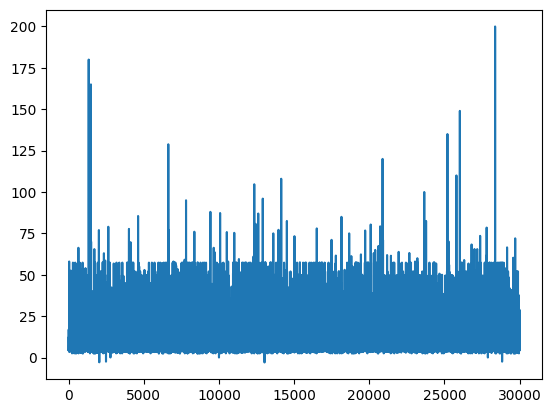

In [227]:
plt.plot(train['fare_amount'])
plt.show()

Remove Outliners in Fare Amount

In [228]:
train2 = train[train['fare_amount'].between(left = 2.5, right = 100)]
train2['passenger_count'].describe()

count    29983.000000
mean         1.665877
std          1.285827
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

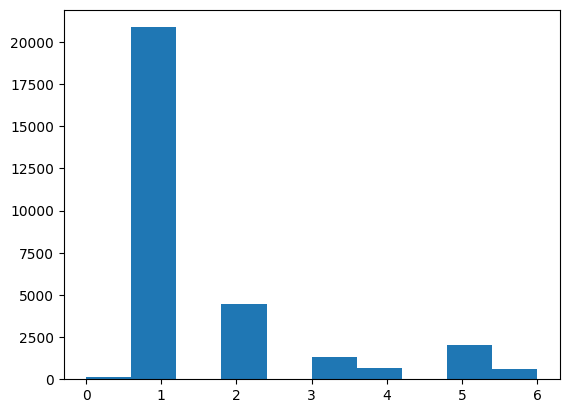

In [229]:
plt.hist(train['passenger_count'])
plt.show()

Remove Outliners in Passeger Count

In [230]:
train3 = train[train['passenger_count'] <= 6]
train3.shape

(30000, 7)

In [231]:
train4 = train3[((train3['pickup_latitude'] >- 90) & (train3['pickup_latitude'] < 90)) &
                ((train3['pickup_longitude'] >- 180) & (train3['pickup_longitude'] < 180)) &
                ((train3["dropoff_latitude"] >- 90) & (train3["dropoff_latitude"] < 90)) &
                ((train3["dropoff_longitude"]>-180) & (train3["dropoff_longitude"] < 180))]

train4.shape

(29999, 7)

In [232]:
train5 = train4[((train4["pickup_longitude"] <= -71.47) & (train4["pickup_longitude"] >= -79.45)) &
                ((train4["pickup_latitude"] >= 40.29) & (train4["pickup_latitude"] <= 45)) &
                ((train4["dropoff_longitude"] <= -71.47) & (train4["dropoff_longitude"] >= -79.45)) &
                ((train4["dropoff_latitude"] >= 40.29) & (train4["dropoff_latitude"] <= 45))]
train5.shape

(29382, 7)

In [233]:
data = [go.Scattermapbox(
            lat= train5['pickup_latitude'] ,
            lon= train5['pickup_longitude'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'gold',
                opacity = .8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i"),
                    width=900,
                    height=600, title = "Pick up Locations in NewYork")

fig = dict(data=data, layout=layout)
offline.iplot(fig)

In [234]:
data = [go.Scattermapbox(
            lat= train5['dropoff_latitude'] ,
            lon= train5['dropoff_longitude'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'cyan',
                opacity = .8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjk4wlc1s02bm2smsqd7qtjhs"),
                    width=900,
                    height=600, title = "Drop off locations in Newyork")
fig = dict(data=data, layout=layout)
offline.iplot(fig)

In [235]:
X.shape

(29382, 6)

In [236]:
T.shape

(29382,)

In [237]:
from geopy.distance import geodesic

def make_distance(lat1, lon1, lat2, lon2):
    pickup = (lat1, lon1)
    dropoff = (lat2, lon2)
    dis = geodesic(pickup, dropoff).km
    return dis

In [238]:
distances = []
for i in range(len(test)):
    distance = make_distance(test.iloc[i,2],test.iloc[i,1],test.iloc[i,4],test.iloc[i,3])
    distances.append(distance)

test["distance"] = distances
test.head()

pickup_datetime  pickup_longitude  pickup_latitude  \
0 2015-01-27 13:08:24+00:00        -73.973320        40.763805   
1 2015-01-27 13:08:24+00:00        -73.986862        40.719383   
2 2011-10-08 11:53:44+00:00        -73.982524        40.751260   
3 2012-12-01 21:12:12+00:00        -73.981160        40.767807   
4 2012-12-01 21:12:12+00:00        -73.966046        40.789775   

   dropoff_longitude  dropoff_latitude  passenger_count  distance  
0         -73.981430         40.743835                1  2.320991  
1         -73.998886         40.739201                1  2.423802  
2         -73.979654         40.746139                1  0.618182  
3         -73.990448         40.751635                1  1.959671  
4         -73.988565         40.744427                1  5.382833

In [239]:
train5.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.841610         40.712278                1  
1         -73.979268         40.782004                1  
2         -73.991242         40.750562                2  
3         -73.991567         40.758092                1  
4         -73.956655         40.783762                1

In [240]:
distances2 = []
for i in range(len(train5)):
    distance2 = make_distance(train5.iloc[i,3],train5.iloc[i,2],train5.iloc[i,5],train5.iloc[i,4])
    distances2.append(distance2)

train5["distance"] = distances2
train5.head()

<ipython-input-240-3664580b965f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  distance  
0         -73.841610         40.712278                1  1.029601  
1         -73.979268         40.782004                1  8.443441  
2         -73.991242         40.750562                2  1.389132  
3         -73.991567         40.758092                1  2.795790  
4         -73.956655         40.783762                1  1.998338

In [241]:
X.shape

(29382, 6)

In [242]:
X = train5.drop('fare_amount', axis = 1)
T = train5['fare_amount']

In [243]:
X.head()

pickup_datetime  pickup_longitude  pickup_latitude  \
0 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  distance  
0         -73.841610         40.712278                1  1.029601  
1         -73.979268         40.782004                1  8.443441  
2         -73.991242         40.750562                2  1.389132  
3         -73.991567         40.758092                1  2.795790  
4         -73.956655         40.783762                1  1.998338

In [244]:
X = X.drop(columns = 'pickup_datetime')
test = test.drop(columns = 'pickup_datetime')

In [245]:
test.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.973320        40.763805         -73.981430         40.743835   
1        -73.986862        40.719383         -73.998886         40.739201   
2        -73.982524        40.751260         -73.979654         40.746139   
3        -73.981160        40.767807         -73.990448         40.751635   
4        -73.966046        40.789775         -73.988565         40.744427   

   passenger_count  distance  
0                1  2.320991  
1                1  2.423802  
2                1  0.618182  
3                1  1.959671  
4                1  5.382833

Predicting

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [247]:
x_train, x_valid, y_train, y_valid = train_test_split(X,T,test_size=0.3,random_state=0)

model = RandomForestRegressor()
model.fit(x_train,y_train)
print('train score :', model.score(x_train, y_train))
print('test score :', model.score(x_valid, y_valid))

train score : 0.9688946140671586
test score : 0.792366506079256


In [248]:
price_pred = model.predict(test)
price_pred

array([ 8.247 ,  8.309 ,  4.187 , ..., 49.6074, 17.918 ,  6.158 ])

In [249]:
submission = pd.read_csv('/content/drive/MyDrive/Kaggle Dataset/Taxi Trip/sample_submission.csv')
submission['fare_amount'] = price_pred
submission.to_csv("Final_Submission.csv", index = False)